Threshold and Edge Detection

1. Threshold

Otsu's threshold: 137


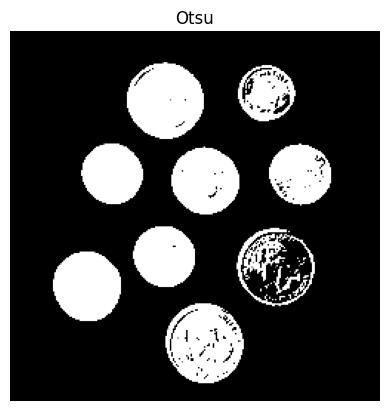

Riddler-Calvard's threshold: 137.80118246864677


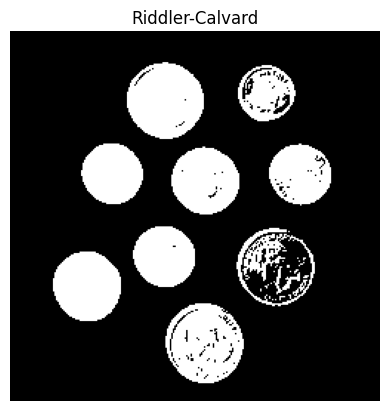

In [1]:
import cv2
from lib.helper import draw
import mahotas

image = cv2.imread("../data/coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# draw("gray", gray)

# (T, thres) = cv2.threshold(blurred, 125, 255, cv2.THRESH_BINARY_INV)
# masked = cv2.bitwise_and(image, image, mask=thres)

# draw("thres", thres)
# draw("masked", masked)

# thres = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
# draw("Mean thres", thres)

# thres = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
# draw("Gaussian thres", thres)

T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))
thres = gray.copy()
thres[thres > T] = 255
thres[thres < T] = 0
thres = cv2.bitwise_not(thres)
draw("Otsu", thres)

T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard's threshold: {}".format(T))
thres = gray.copy()
thres[thres > T] = 255
thres[thres < 255] = 0
thres = cv2.bitwise_not(thres)
draw("Riddler-Calvard", thres)



2. Gradient Of Image

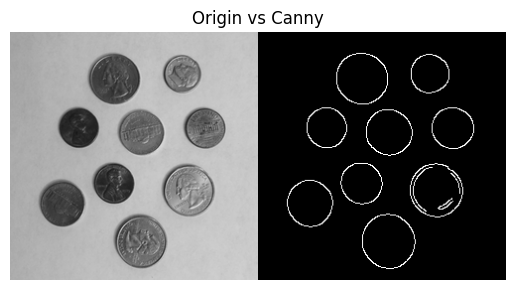

In [2]:
import cv2
import numpy as np
from lib.auto_canny import auto_canny

image = cv2.imread("../data/coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# lap = cv2.Laplacian(blurred, cv2.CV_64F)
# lap = np.uint8(np.absolute(lap))
# draw("Origin vs Laplacian", np.hstack([gray, lap]))

# sobelX = cv2.Sobel(blurred, cv2.CV_64F, 1, 0)
# sobelY = cv2.Sobel(blurred, cv2.CV_64F, 0, 1)

# sobelX = np.uint8(np.absolute(sobelX))
# sobelY = np.uint8(np.absolute(sobelY))

# sobelCombined = cv2.bitwise_or(sobelX, sobelY)

# draw("Origin vs SobelX vs SobelY vs Combined", np.hstack([gray, sobelX, sobelY, sobelCombined]))

canny = auto_canny(blurred)
draw("Origin vs Canny", np.hstack([gray, canny]))


3. Edge Detection

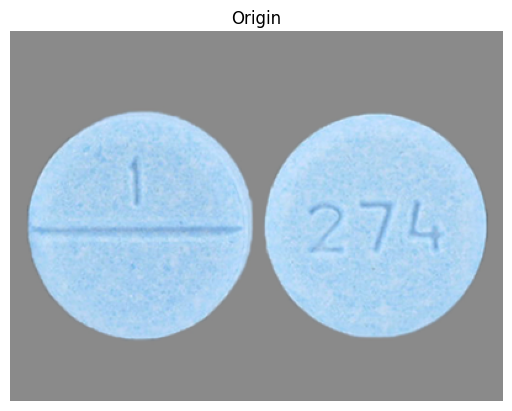

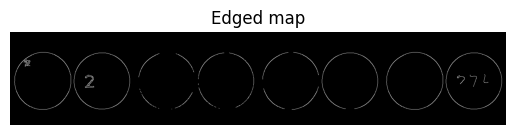

In [1]:
import numpy as np
import cv2
from lib.auto_canny import auto_canny
from lib.helper import draw

image = cv2.imread("../data/clonazepam_1mg.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 240, 250)
middle = cv2.Canny(blurred, 200, 250)
auto = auto_canny(blurred)

draw("Origin", image, True)
draw("Edged map", np.hstack([wide, tight, middle, auto]), True)
